In [2]:
# importation des librairies
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# récupération du chemin d'accès de la typo et récupération de celle-ci dans la variable prop
fpath = os.path.join(mpl.get_data_path(), r'C:\Users\omira\Downloads\Optima Medium.ttf')
prop = fm.FontProperties(fname=fpath)

text_kwargs = dict(ha='center', va='center', fontsize=14, color='white')

# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark', font_scale=1, color_codes=True, rc=None)
sns.set(font=prop.get_name())
# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

# set dark background
plt.style.use("dark_background")

In [4]:
# chargement du dataframe
df = pd.read_csv('C:/Users/omira/Desktop/Anticipate-Energy-Needs/2016_Building_Energy_Benchmarking.csv')
# afficher toutes les colonnes
pd.set_option('display.max_columns', None)

In [7]:
# affichage + taille du dataframe
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [23]:
# describe
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [8]:
# check des doublons
df.loc[df.duplicated(keep=False),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [25]:
# check des valeurs manquantes
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [5]:
df_subset = df[["BuildingType","PrimaryPropertyType","YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions"]]

In [27]:
df_subset

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions
0,NonResidential,Hotel,1927,1.0,12,88434,60.0,81.699997,7.226362e+06,1.156514e+06,12764.529300,249.98
1,NonResidential,Hotel,1996,1.0,11,103566,61.0,94.800003,8.387933e+06,9.504252e+05,51450.816410,295.86
2,NonResidential,Hotel,1969,1.0,41,956110,43.0,96.000000,7.258702e+07,1.451544e+07,14938.000000,2089.28
3,NonResidential,Hotel,1926,1.0,10,61320,56.0,110.800003,6.794584e+06,8.115253e+05,18112.130860,286.43
4,NonResidential,Hotel,1980,1.0,18,175580,75.0,114.800003,1.417261e+07,1.573449e+06,88039.984380,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,1990,1.0,1,12294,46.0,69.099998,8.497457e+05,1.536550e+05,3254.750244,20.94
3372,Nonresidential COS,Other,2004,1.0,1,16000,NaN,59.400002,9.502762e+05,1.162210e+05,5537.299805,32.17
3373,Nonresidential COS,Other,1974,1.0,1,13157,NaN,438.200012,5.765898e+06,5.252517e+05,39737.390630,223.54
3374,Nonresidential COS,Mixed Use Property,1989,1.0,1,14101,NaN,51.000000,7.194712e+05,1.022480e+05,3706.010010,22.11


In [28]:
df_subset.isnull().sum()

BuildingType             0
PrimaryPropertyType      0
YearBuilt                0
NumberofBuildings        8
NumberofFloors           0
PropertyGFATotal         0
ENERGYSTARScore        843
SiteEUI(kBtu/sf)         7
SiteEnergyUse(kBtu)      5
Electricity(kWh)         9
NaturalGas(therms)       9
TotalGHGEmissions        9
dtype: int64

In [29]:
df_subset.dtypes

BuildingType            object
PrimaryPropertyType     object
YearBuilt                int64
NumberofBuildings      float64
NumberofFloors           int64
PropertyGFATotal         int64
ENERGYSTARScore        float64
SiteEUI(kBtu/sf)       float64
SiteEnergyUse(kBtu)    float64
Electricity(kWh)       float64
NaturalGas(therms)     float64
TotalGHGEmissions      float64
dtype: object

In [6]:
# le subset sans données manquantes, EnergyScore à part
df_subset_one = df[["BuildingType","PrimaryPropertyType","YearBuilt","NumberofFloors","PropertyGFATotal"]]

# le subset avec les données manquantes
df_subset_two = df[["NumberofBuildings","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions","ENERGYSTARScore"]]

In [7]:
# remplacement des valeurs manquantes avec l'algorithme KNNImputer
imputer = KNNImputer(n_neighbors=8)
imputed_df = pd.DataFrame(imputer.fit_transform(df_subset_two), columns=df_subset_two.columns)

In [8]:
# fusion des 2 subsets
df_clean = pd.concat([df_subset_one,imputed_df], axis=1)

In [23]:
df_clean.shape

(3376, 12)

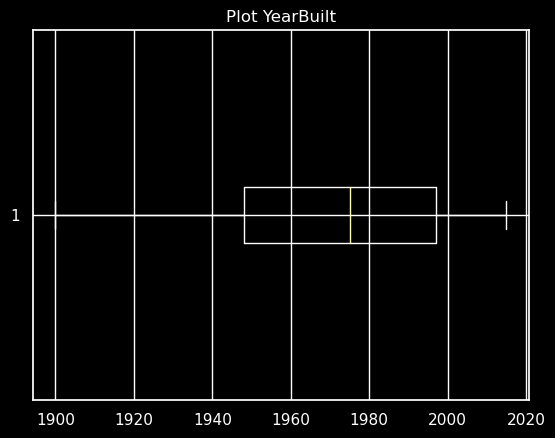

YearBuilt


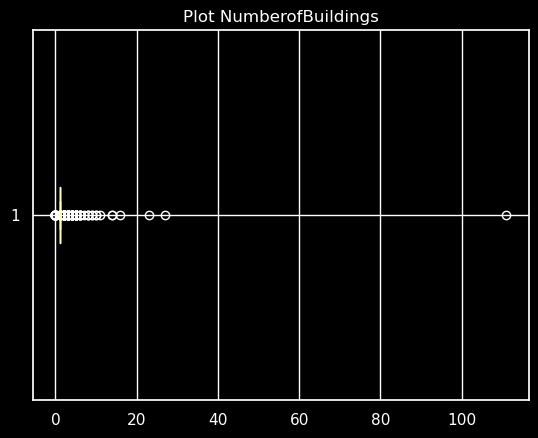

NumberofBuildings


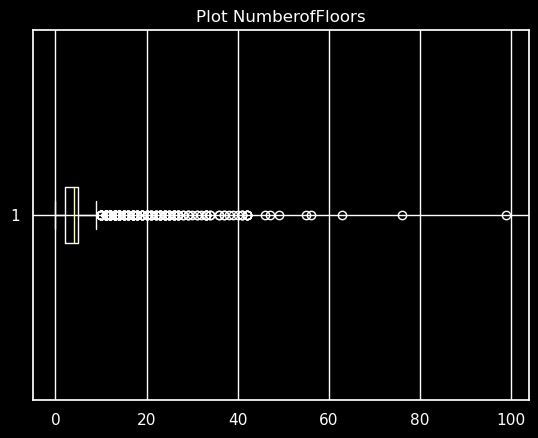

NumberofFloors


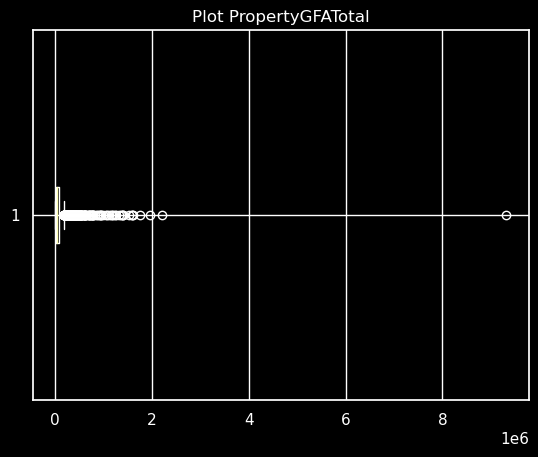

PropertyGFATotal


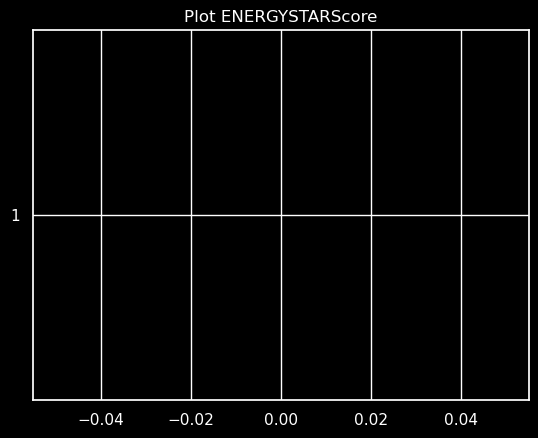

ENERGYSTARScore


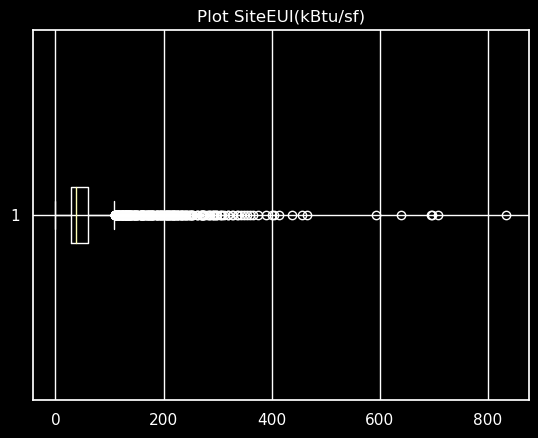

SiteEUI(kBtu/sf)


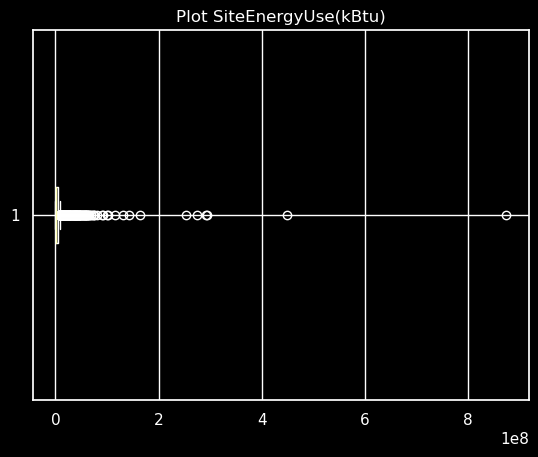

SiteEnergyUse(kBtu)


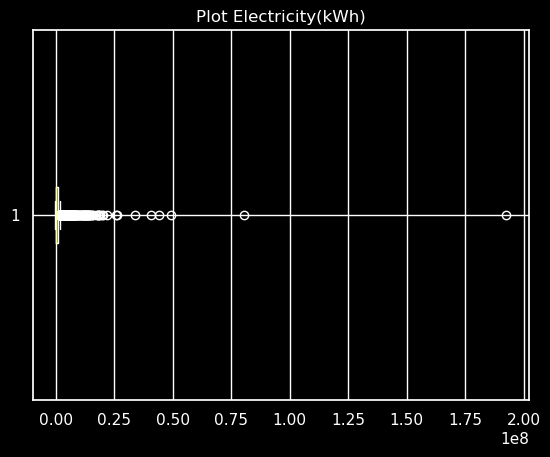

Electricity(kWh)


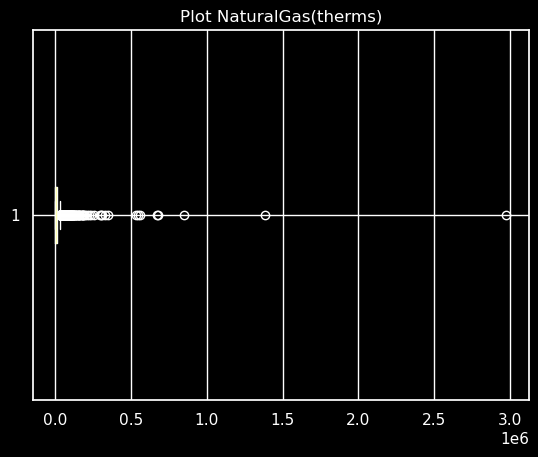

NaturalGas(therms)


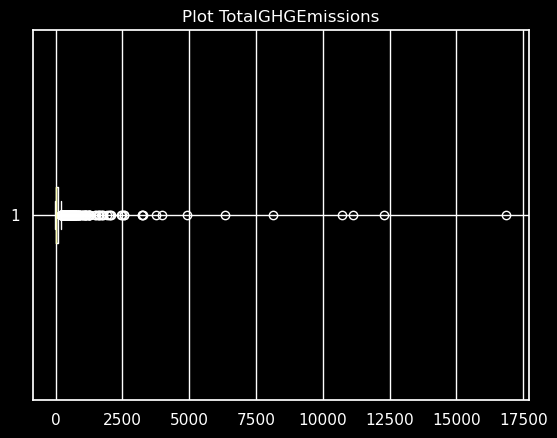

TotalGHGEmissions


In [66]:
# on vérifie les outliers
list_columns = ["YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions"]

for columns_name in list_columns:
    plt.title(f"Plot {columns_name}")
    plt.boxplot(df_clean[columns_name], vert=False)
    plt.show()
    print(columns_name)

In [9]:
#suppression des outliers
df_clean = df_clean[df_clean['NumberofBuildings'] <= 40]
df_clean = df_clean[df_clean['NumberofFloors'] <= 80]
df_clean = df_clean[df_clean['PropertyGFATotal'] <= 1800000]
df_clean = df_clean[df_clean['SiteEUI(kBtu/sf)'] <= 450]
df_clean = df_clean[df_clean['SiteEnergyUse(kBtu)'] <= 80000000]
df_clean = df_clean[df_clean['Electricity(kWh)'] <= 20000000]
df_clean = df_clean[df_clean['NaturalGas(therms)'] <= 200000]
df_clean = df_clean[df_clean['TotalGHGEmissions'] <= 1900]

In [10]:
df_clean.shape

(3341, 12)

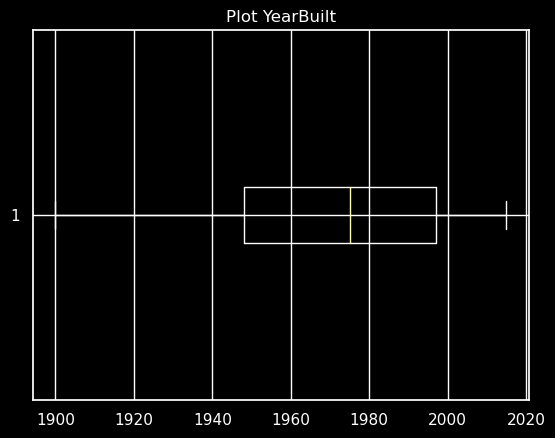

YearBuilt


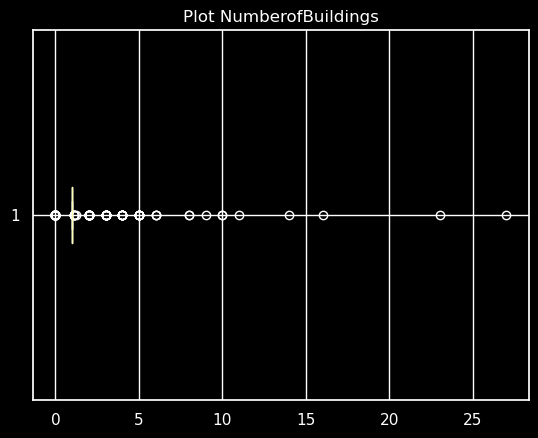

NumberofBuildings


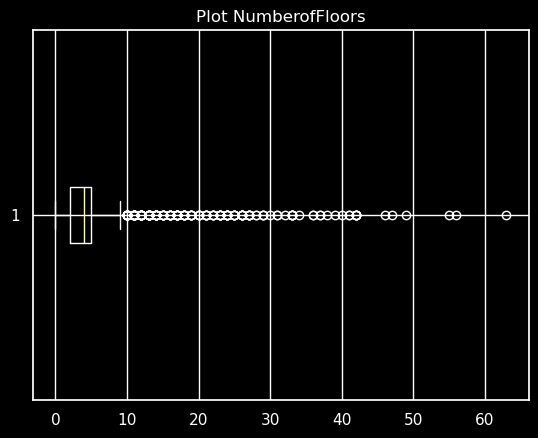

NumberofFloors


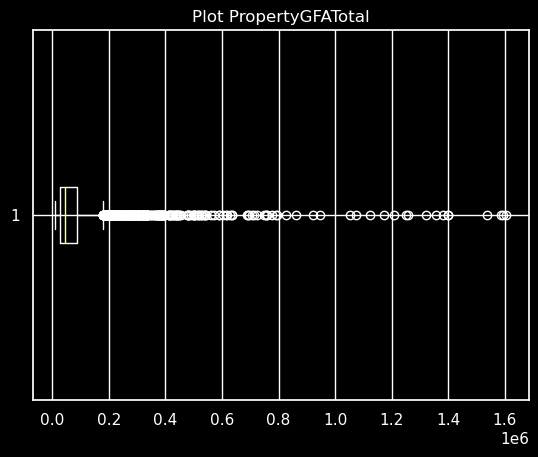

PropertyGFATotal


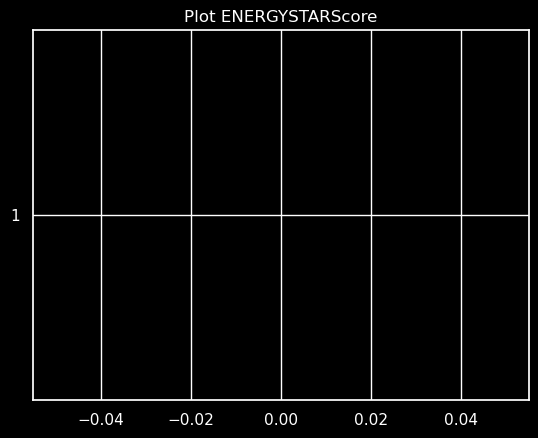

ENERGYSTARScore


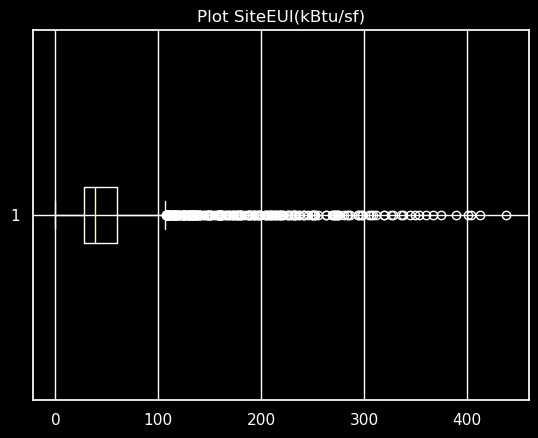

SiteEUI(kBtu/sf)


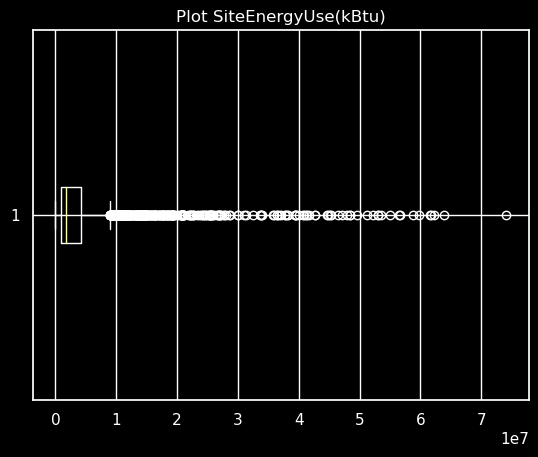

SiteEnergyUse(kBtu)


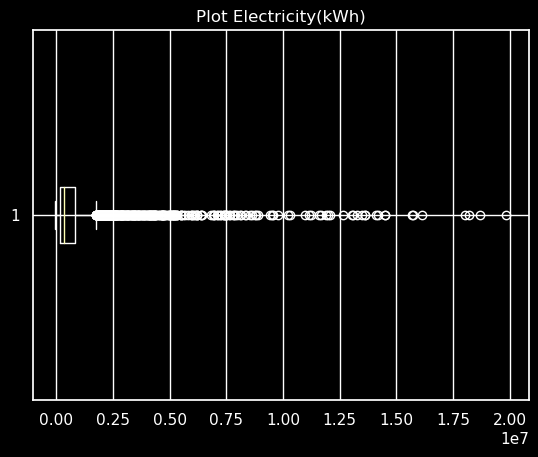

Electricity(kWh)


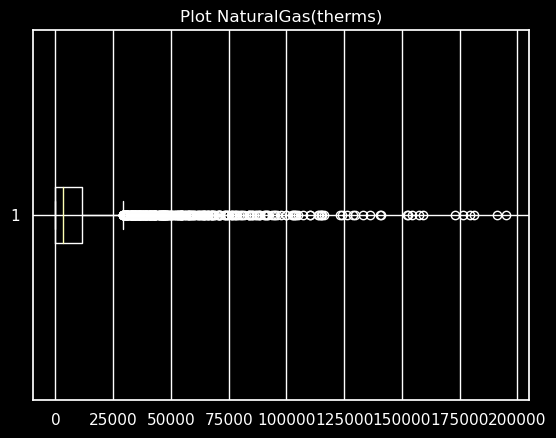

NaturalGas(therms)


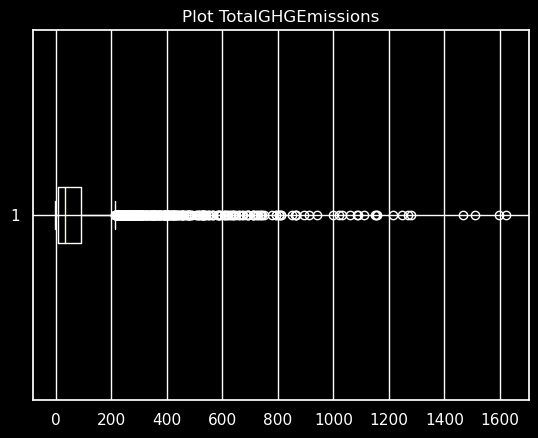

TotalGHGEmissions


In [75]:
# on vérifie les outliers
list_columns = ["YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions"]

for columns_name in list_columns:
    plt.title(f"Plot {columns_name}")
    plt.boxplot(df_clean[columns_name], vert=False)
    plt.show()
    print(columns_name)

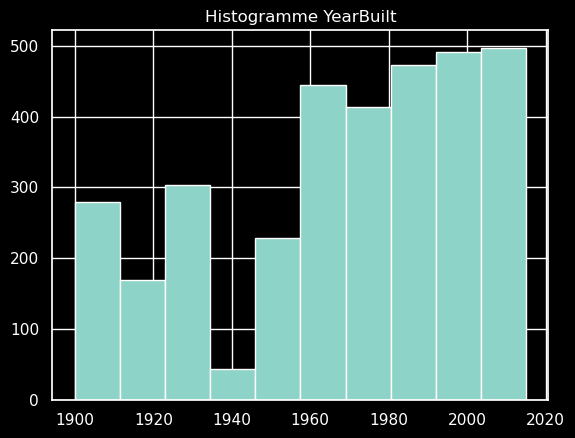

YearBuilt


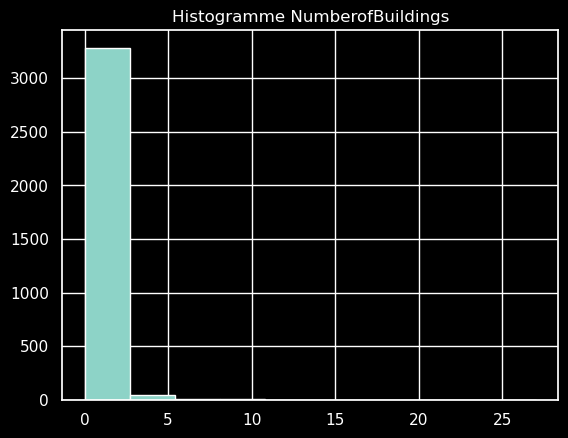

NumberofBuildings


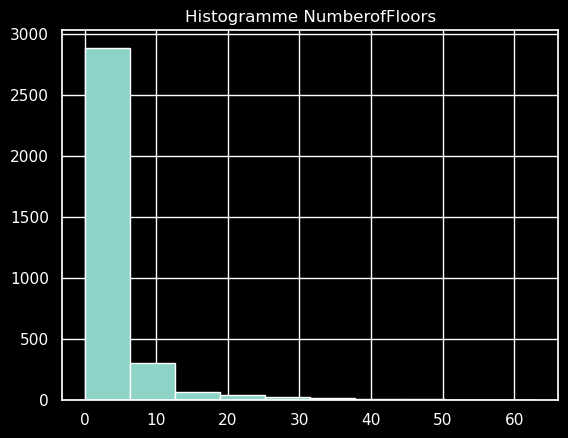

NumberofFloors


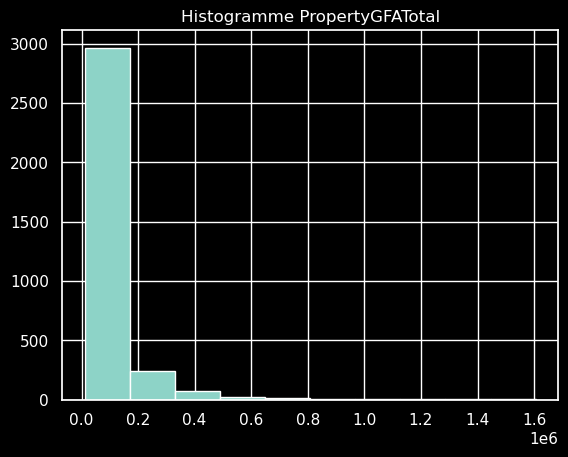

PropertyGFATotal


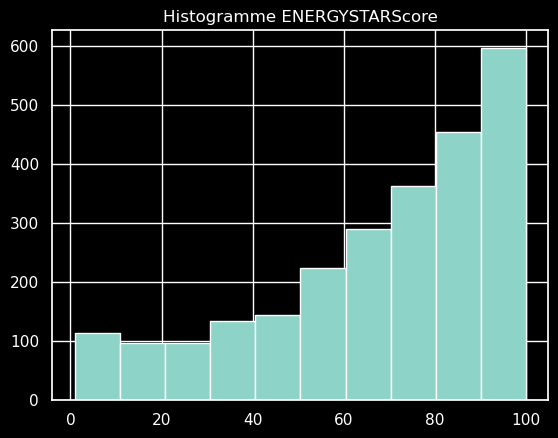

ENERGYSTARScore


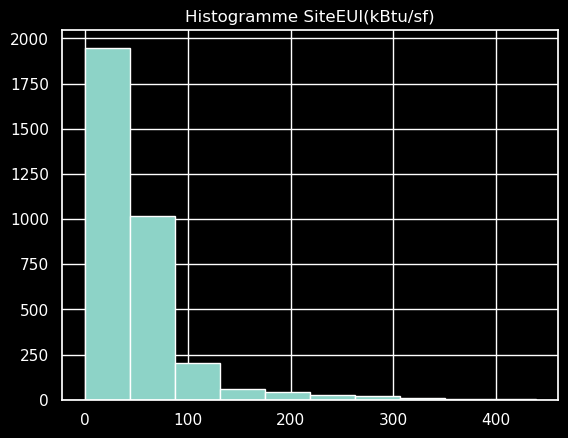

SiteEUI(kBtu/sf)


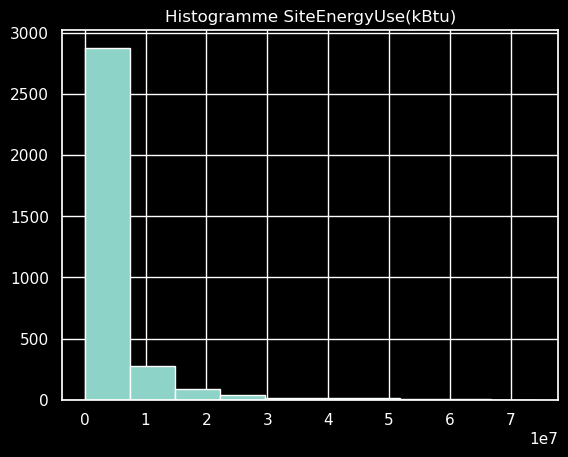

SiteEnergyUse(kBtu)


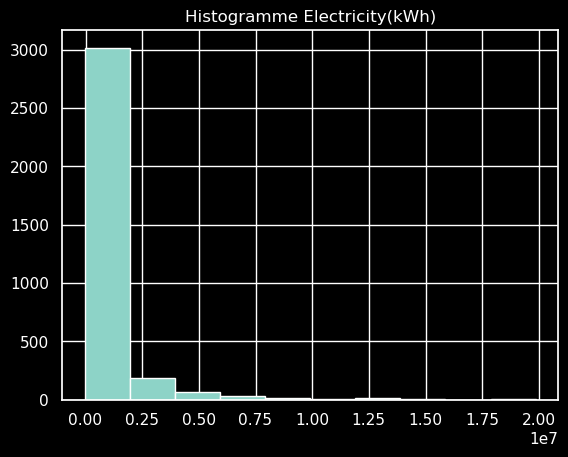

Electricity(kWh)


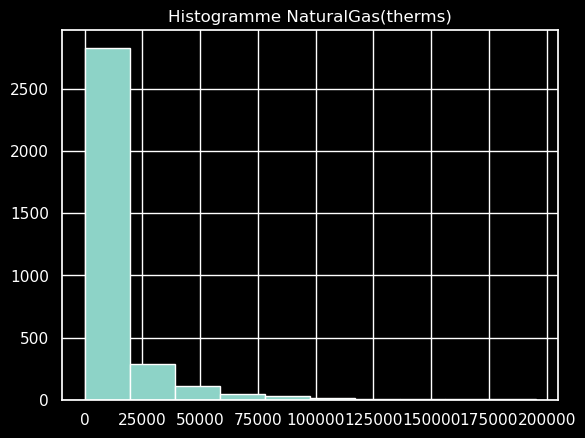

NaturalGas(therms)


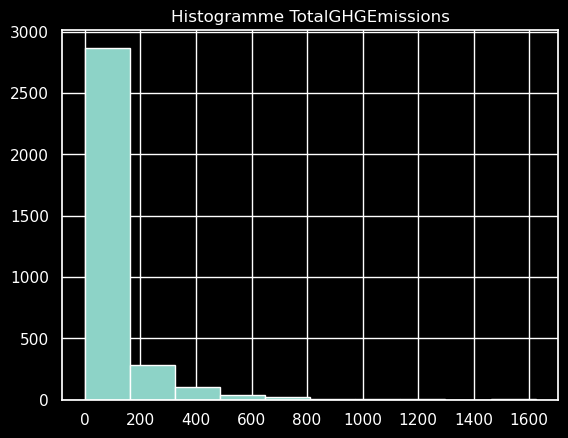

TotalGHGEmissions


In [76]:
# on vérifie que la distribution des variables est correcte
list_columns = ["YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions"]

for columns_name in list_columns:
    plt.title(f"Histogramme {columns_name}")
    plt.hist(df_clean[columns_name])
    plt.show()
    print(columns_name)

In [78]:
df_clean.shape

(3341, 12)

In [19]:
df_clean.isnull().sum()

BuildingType             0
PrimaryPropertyType      0
YearBuilt                0
NumberofFloors           0
PropertyGFATotal         0
ENERGYSTARScore        832
NumberofBuildings        0
SiteEUI(kBtu/sf)         0
SiteEnergyUse(kBtu)      0
Electricity(kWh)         0
NaturalGas(therms)       0
TotalGHGEmissions        0
dtype: int64

<AxesSubplot:title={'center':'Matrice des correlations'}>

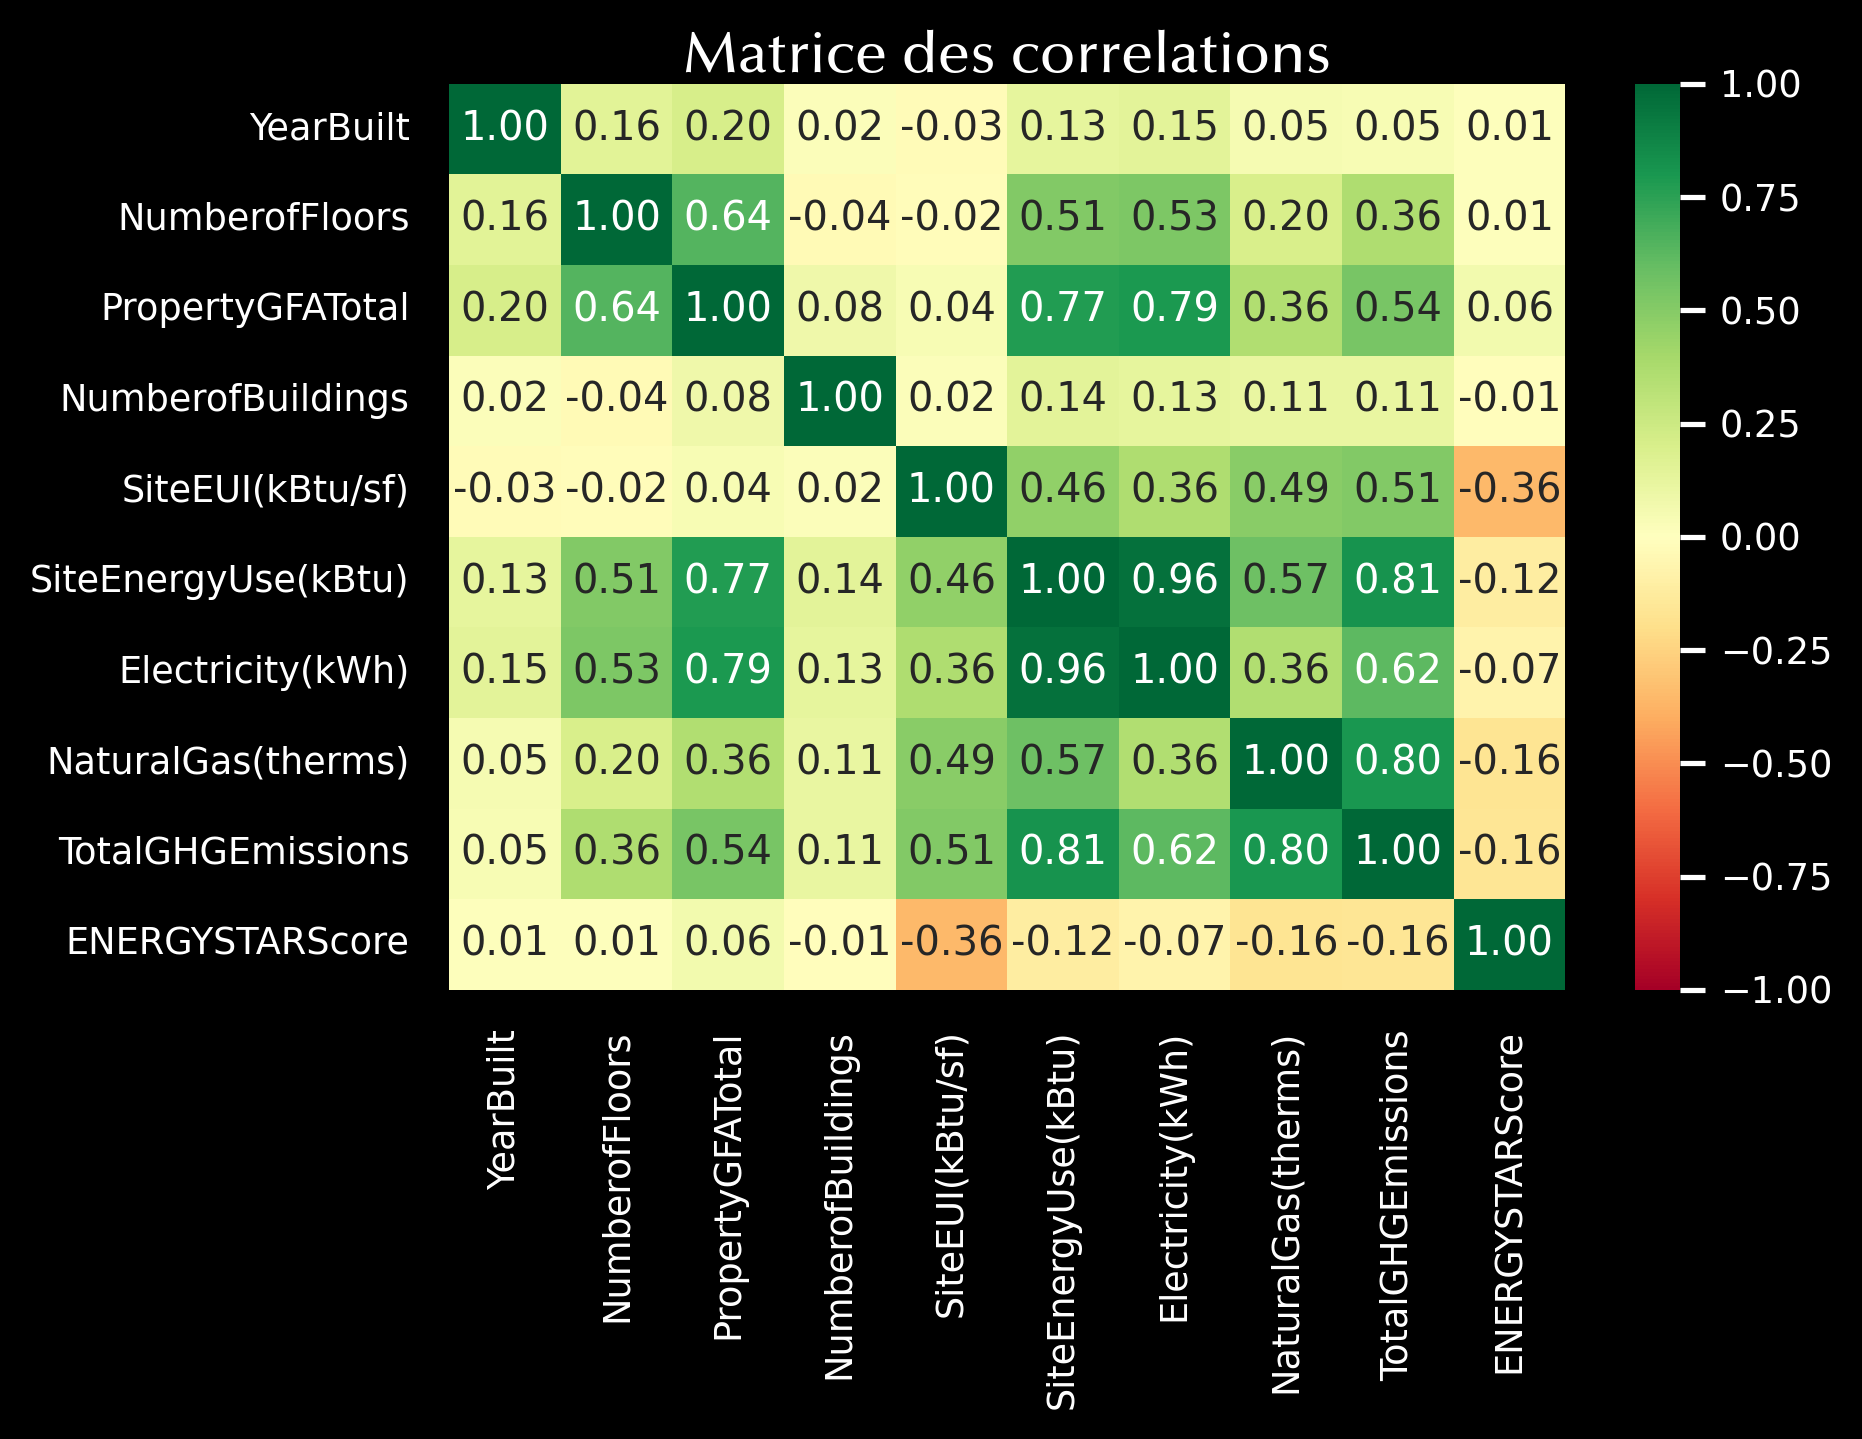

In [15]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

sns.set(font=prop.get_name(), font_scale=0.8)
plt.style.use("dark_background")
plt.title("Matrice des correlations", fontproperties=prop, **text_kwargs)
sns.heatmap(df_clean.corr(), cmap='RdYlGn', annot=True, fmt=".2f",vmin=-1, vmax=1)

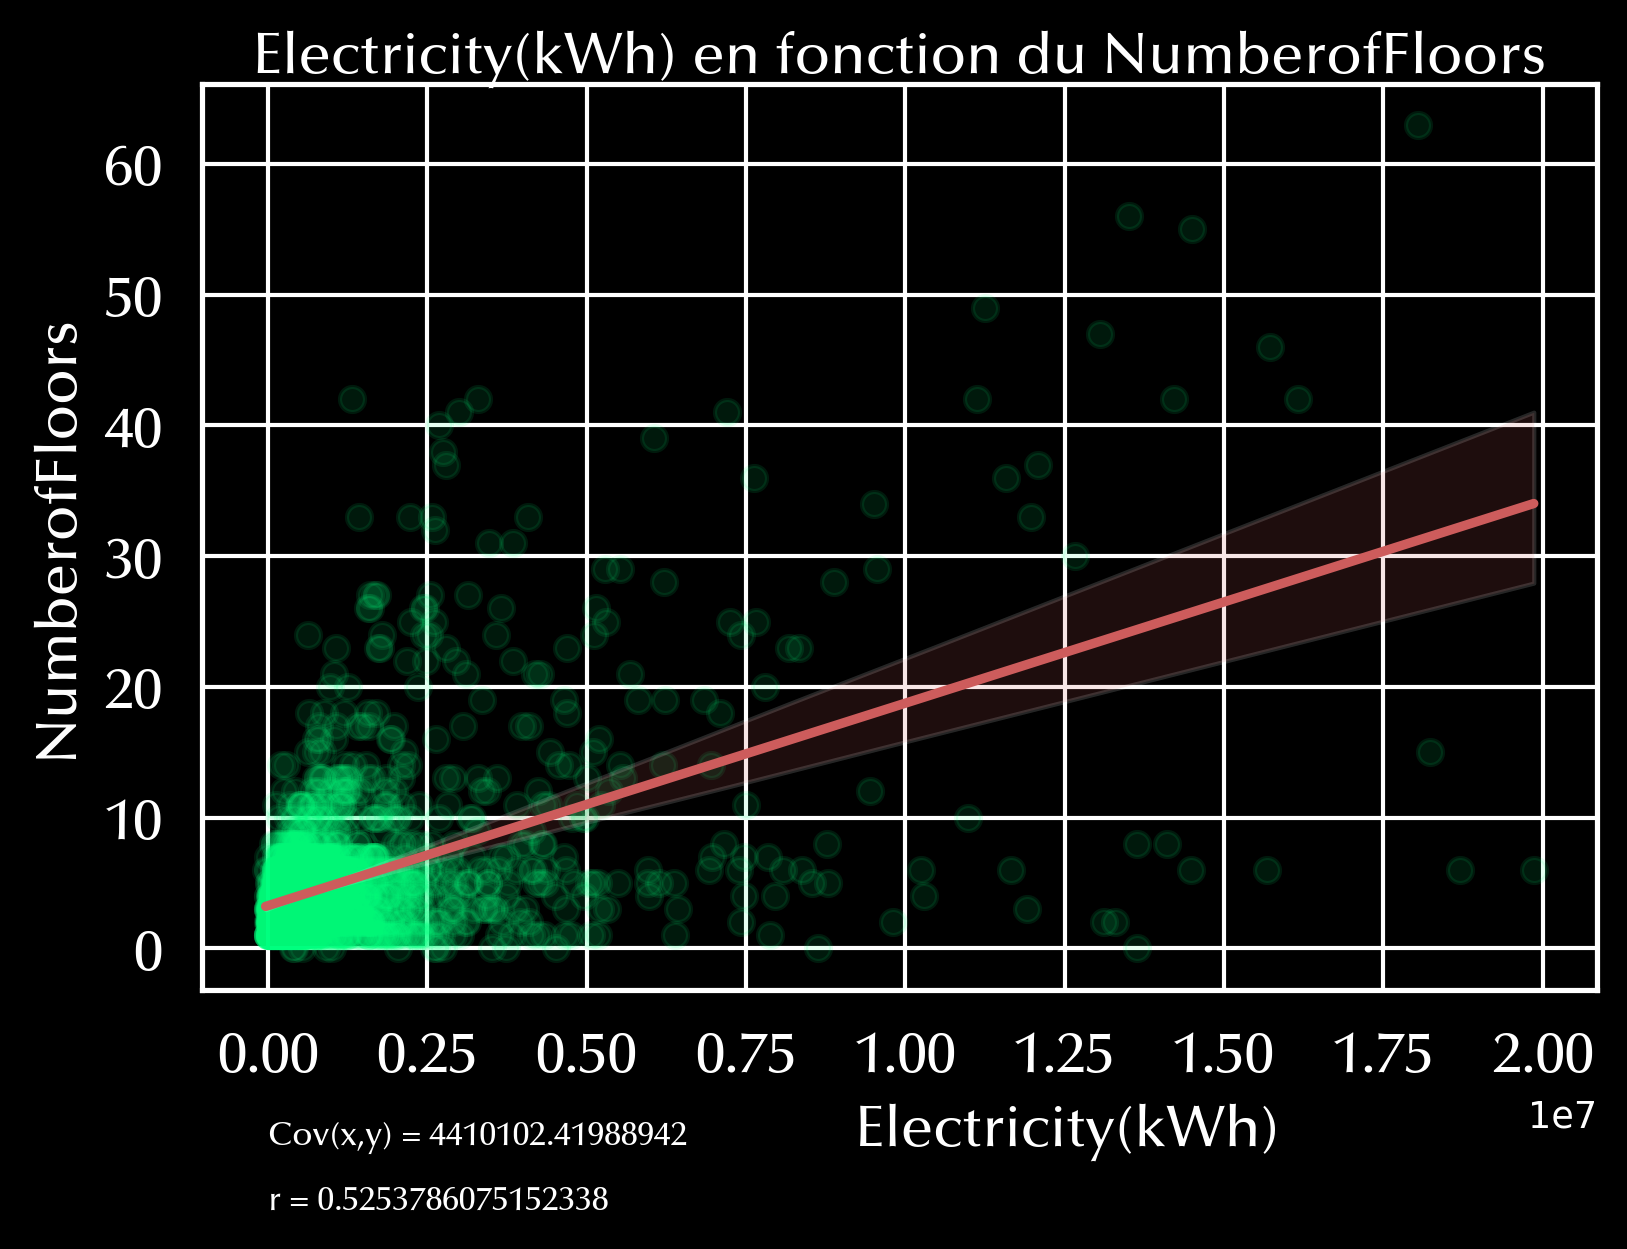

In [107]:
# on stocke la valeur du coefficient de pearson dans une variable
r_value = st.pearsonr(df_clean["Electricity(kWh)"],df_clean["NumberofFloors"])[0]
# même chose pour la covariance
cov_value = np.cov(df_clean["Electricity(kWh)"],df_clean["NumberofFloors"],ddof=0)[1,0]


#customisation du graph
plt.style.use("dark_background")
plt.title("Electricity(kWh) en fonction du NumberofFloors", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)
ax = sns.regplot(x="Electricity(kWh)", y="NumberofFloors", data=df_clean, color='springgreen',line_kws={"color":"indianred"},scatter_kws={"alpha":0.1,"edgecolor":"springgreen"}, marker='o')
plt.xlabel("                       Electricity(kWh)", fontproperties=prop, size = 14)
plt.ylabel("NumberofFloors", fontproperties=prop, size = 14)
plt.text(100, -20, 'r = {}'.format(r_value), fontproperties=prop, size=8)
plt.text(20, -15, 'Cov(x,y) = {}'.format(cov_value), fontproperties=prop, size=8)
ax.grid(True)
plt.show()

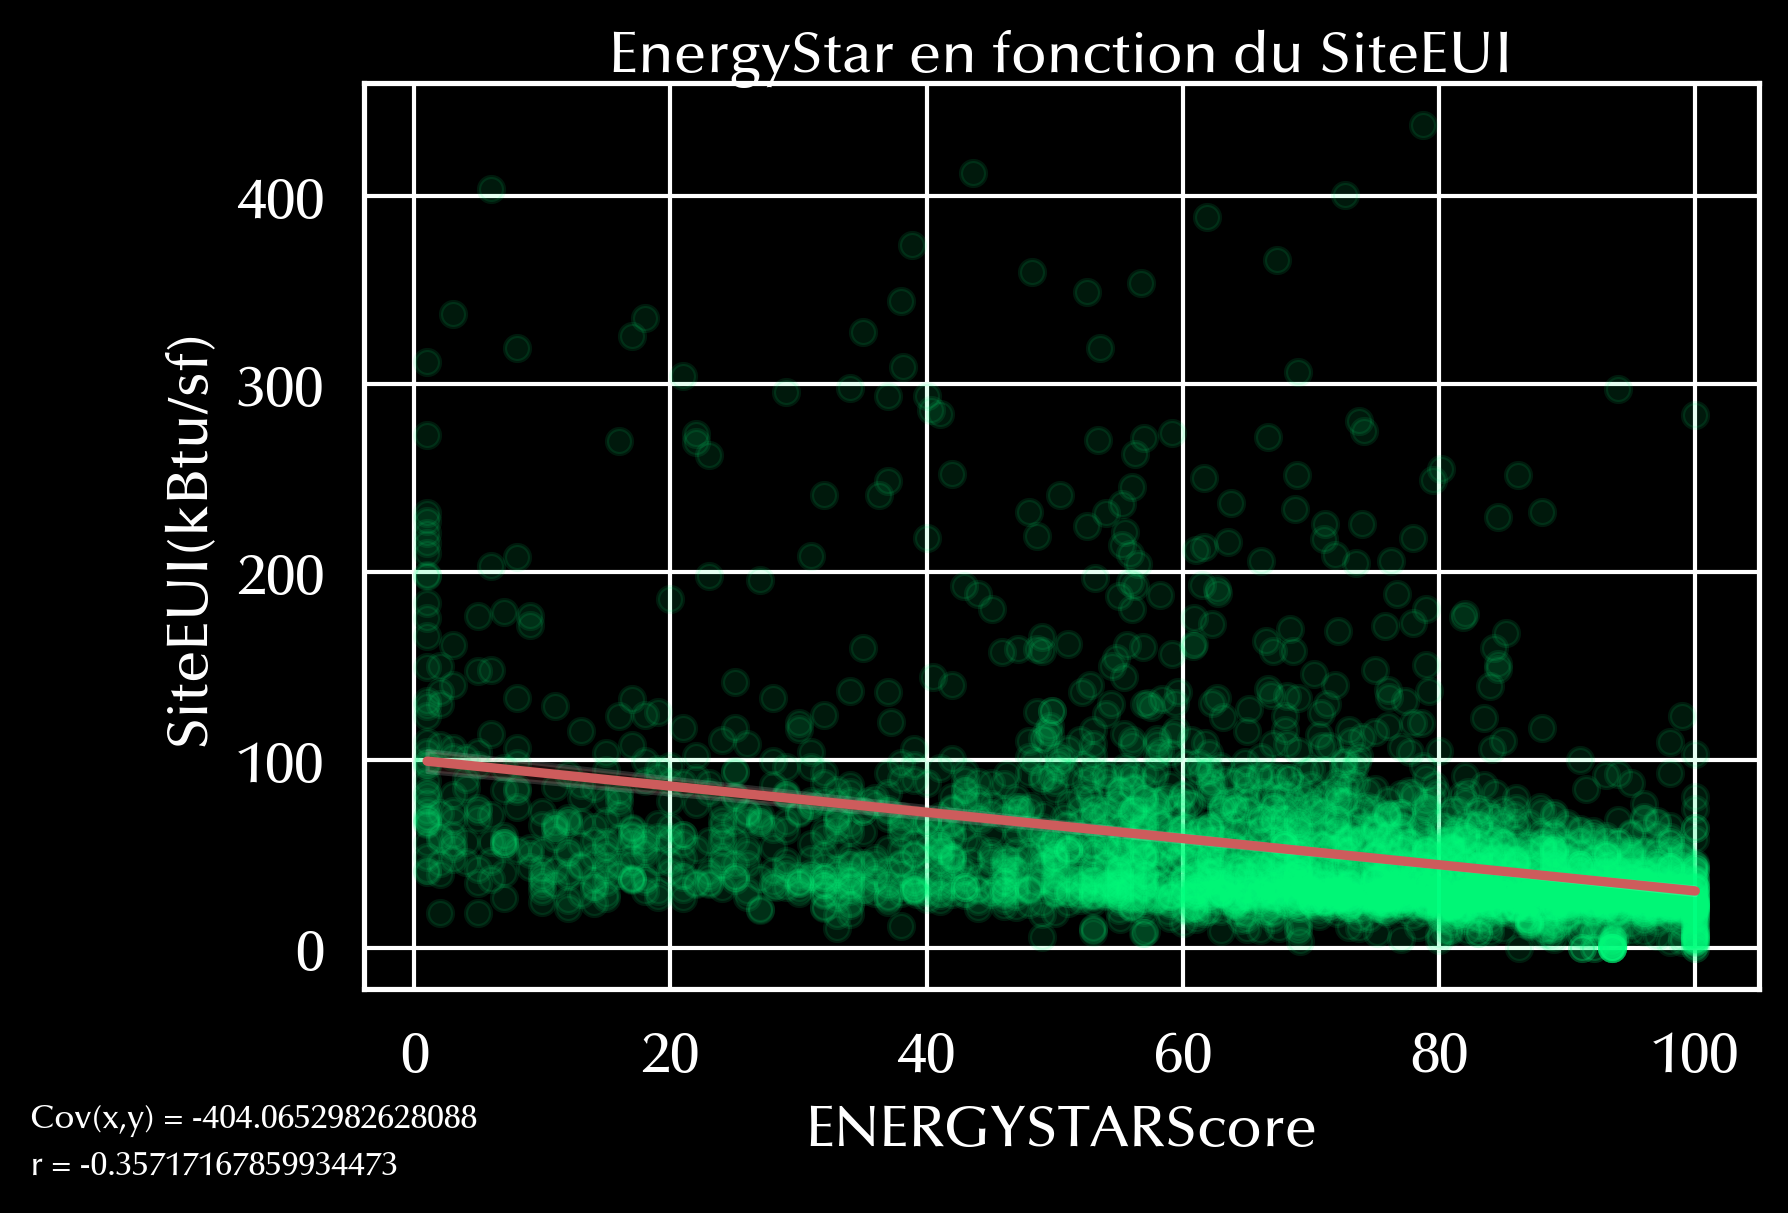

In [83]:
# on stocke la valeur du coefficient de pearson dans une variable
r_value = st.pearsonr(df_clean["ENERGYSTARScore"],df_clean["SiteEUI(kBtu/sf)"])[0]
# même chose pour la covariance
cov_value = np.cov(df_clean["ENERGYSTARScore"],df_clean["SiteEUI(kBtu/sf)"],ddof=0)[1,0]


#customisation du graph
plt.style.use("dark_background")
plt.title("EnergyStar en fonction du SiteEUI", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)
ax = sns.regplot(x="ENERGYSTARScore", y="SiteEUI(kBtu/sf)", data=df_clean, color='springgreen',line_kws={"color":"indianred"},scatter_kws={"alpha":0.1,"edgecolor":"springgreen"}, marker='o')
plt.xlabel("ENERGYSTARScore", fontproperties=prop, size = 14)
plt.ylabel("SiteEUI(kBtu/sf)", fontproperties=prop, size = 14)
plt.text(-30, -120, 'r = {}'.format(r_value), fontproperties=prop, size=8)
plt.text(-30, -95, 'Cov(x,y) = {}'.format(cov_value), fontproperties=prop, size=8)
ax.grid(True)
plt.show()

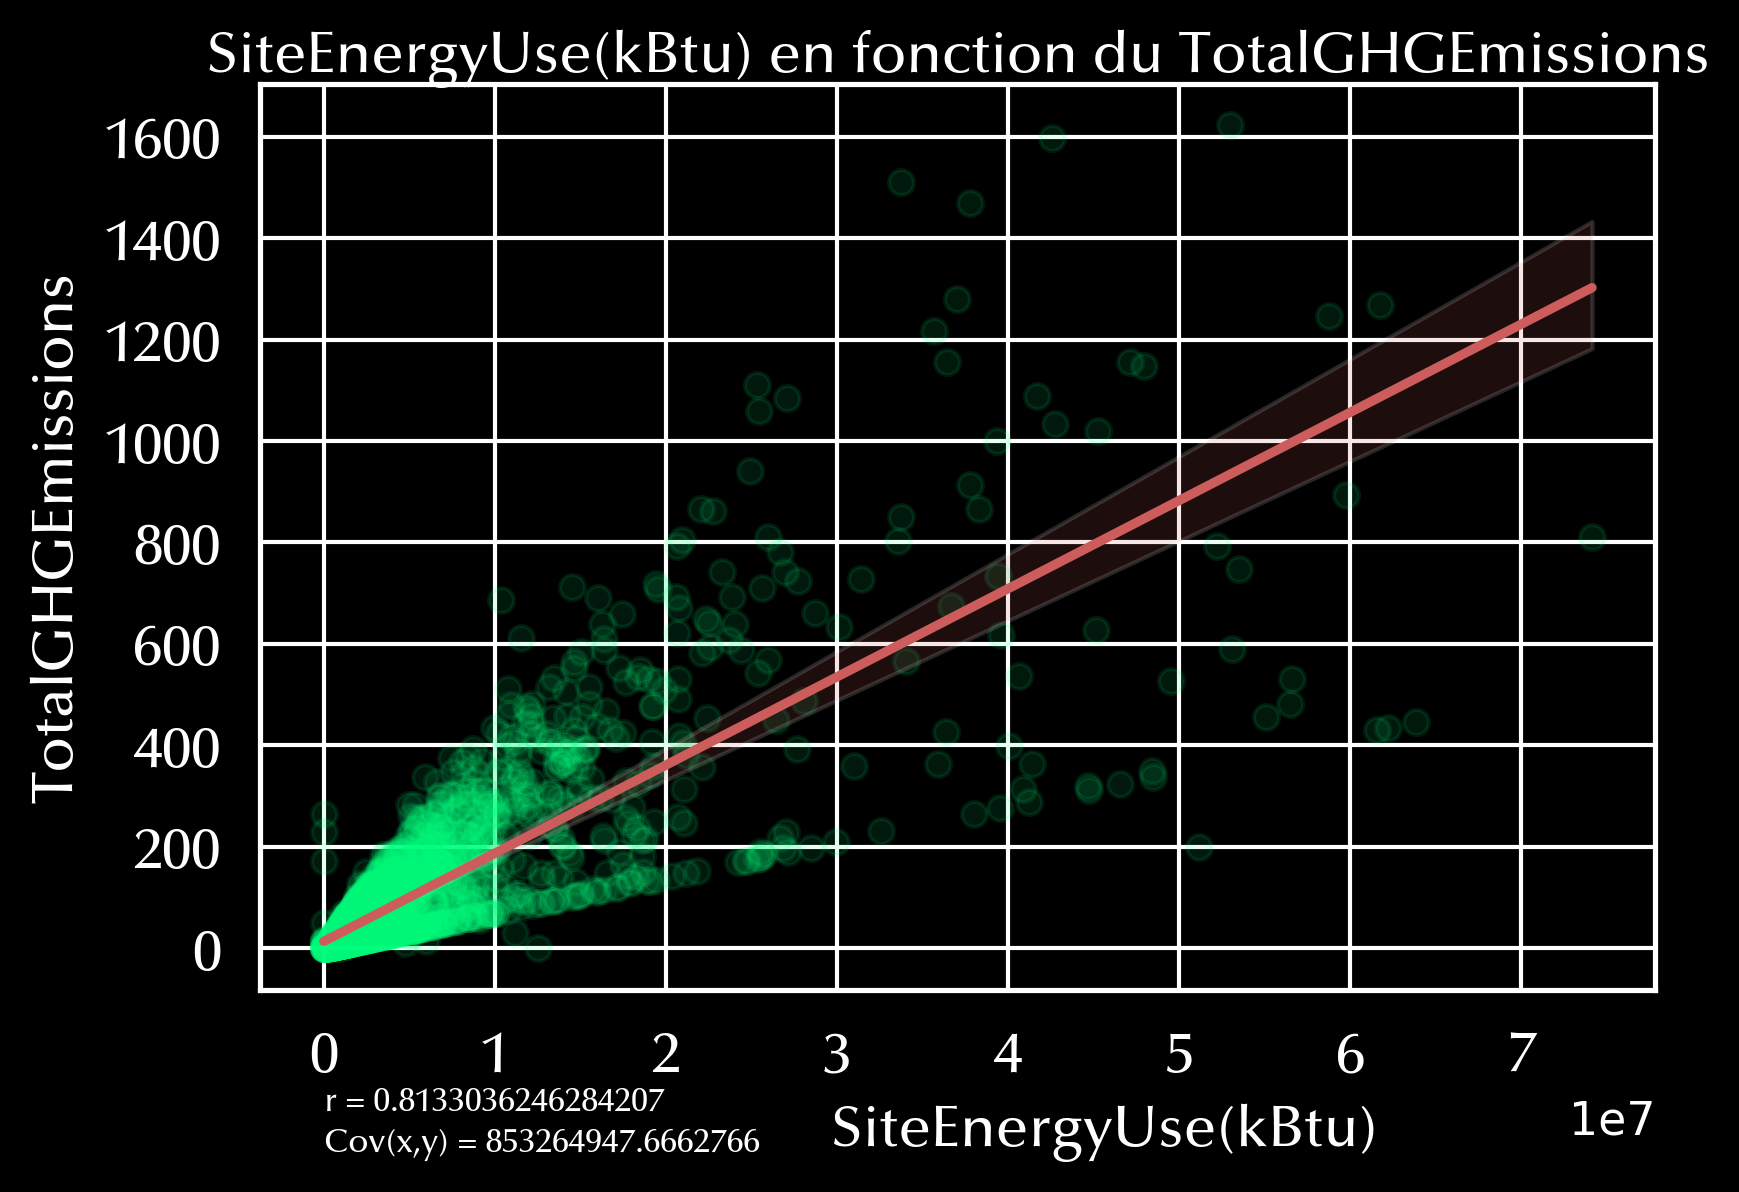

In [82]:
# on stocke la valeur du coefficient de pearson dans une variable
r_value = st.pearsonr(df_clean["SiteEnergyUse(kBtu)"],df_clean["TotalGHGEmissions"])[0]
# même chose pour la covariance
cov_value = np.cov(df_clean["SiteEnergyUse(kBtu)"],df_clean["TotalGHGEmissions"],ddof=0)[1,0]


#customisation du graph
plt.style.use("dark_background")
plt.title("SiteEnergyUse(kBtu) en fonction du TotalGHGEmissions", fontproperties=prop, **text_kwargs)
plt.xticks(fontsize=14, fontproperties=prop)
plt.yticks(fontsize=14, fontproperties=prop)
ax = sns.regplot(x="SiteEnergyUse(kBtu)", y="TotalGHGEmissions", data=df_clean, color='springgreen',line_kws={"color":"indianred"},scatter_kws={"alpha":0.1,"edgecolor":"springgreen"}, marker='o')
plt.xlabel("                    SiteEnergyUse(kBtu)", fontproperties=prop, size = 14)
plt.ylabel("TotalGHGEmissions", fontproperties=prop, size = 14)
plt.text(1000, -320, 'r = {}'.format(r_value), fontproperties=prop, size=8)
plt.text(1000, -400, 'Cov(x,y) = {}'.format(cov_value), fontproperties=prop, size=8)
ax.grid(True)
plt.show()

In [64]:
df_pca = df_clean[["YearBuilt","NumberofBuildings","NumberofFloors","PropertyGFATotal",
                "ENERGYSTARScore","SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","Electricity(kWh)",
                "NaturalGas(therms)","TotalGHGEmissions"]]

In [65]:
X = df_pca.values
names = df_pca.index
features = df_pca.columns

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 10

# Créer un objet PCA avec le nombre de composantes souhaité
pca = PCA(n_components=n_components)

pca.fit(X_scaled)

PCA(n_components=10)

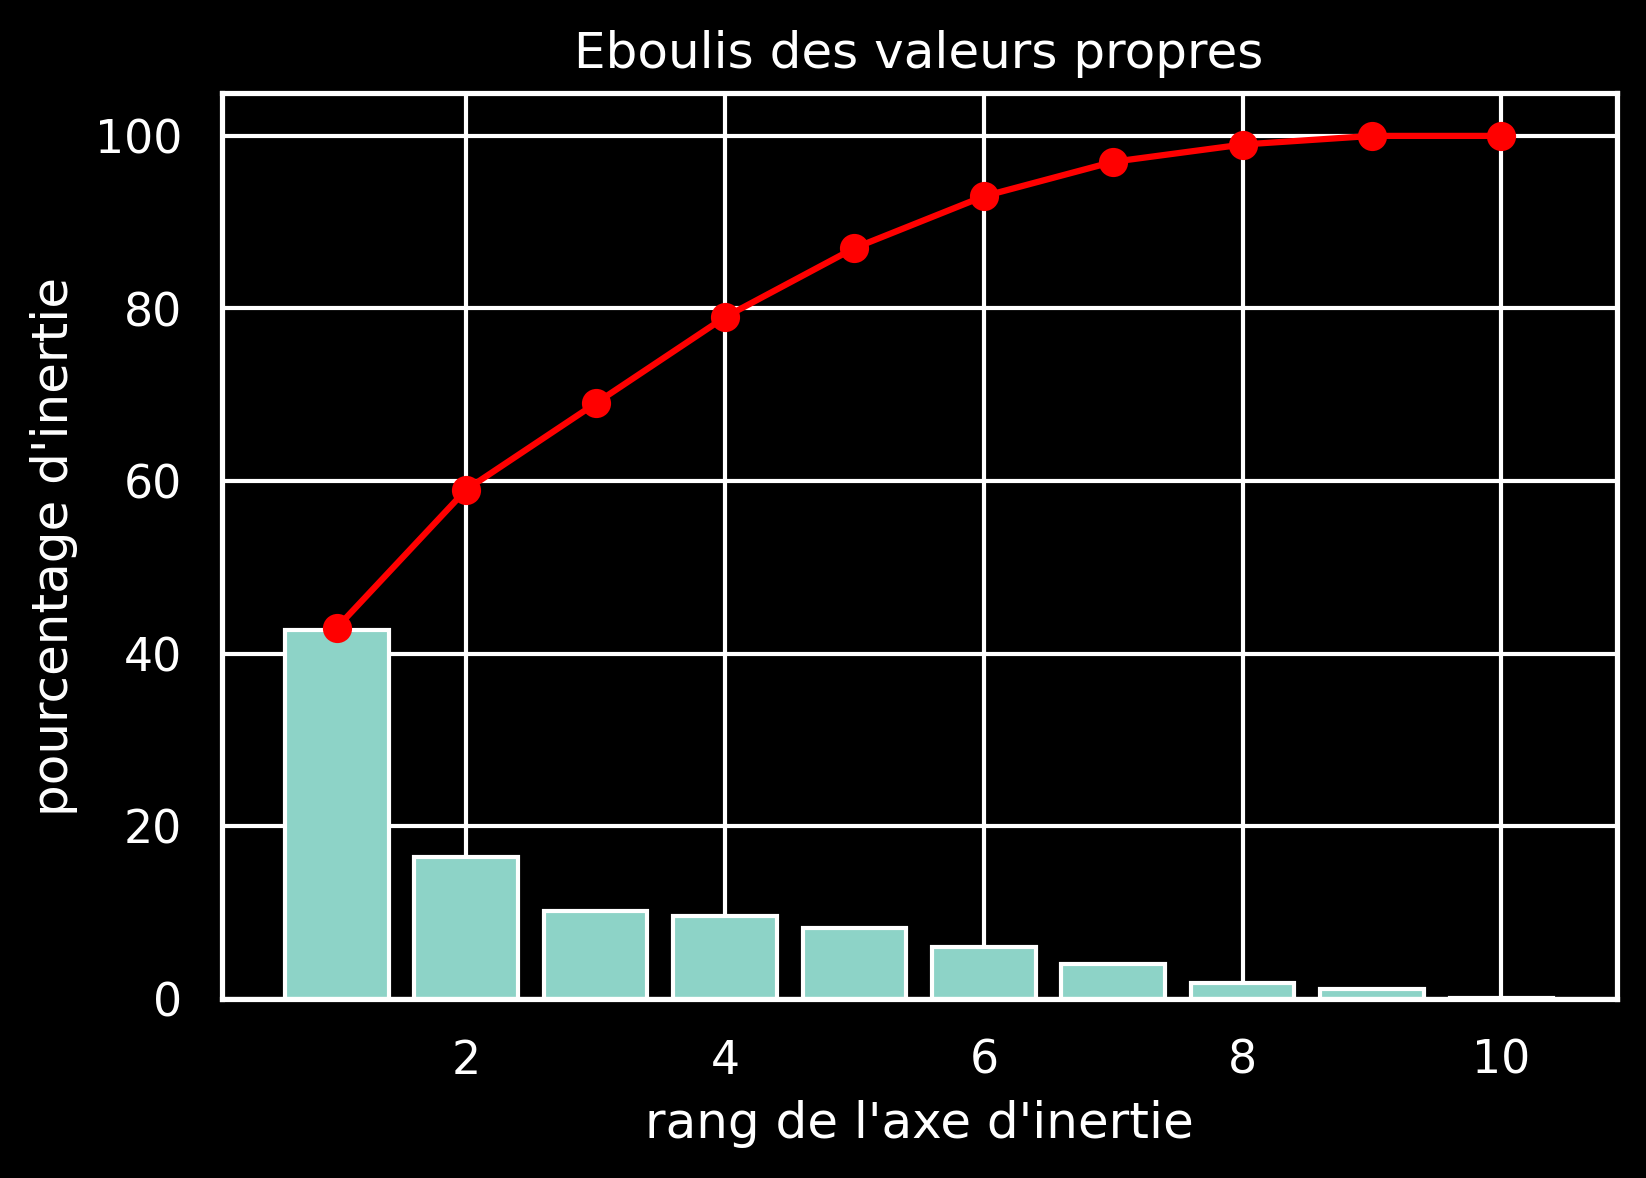

In [68]:
pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree

# on arrondit à la somme cumulée
scree_cum = scree.cumsum().round()
scree_cum

x_list = range(1, n_components+1)
list(x_list)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

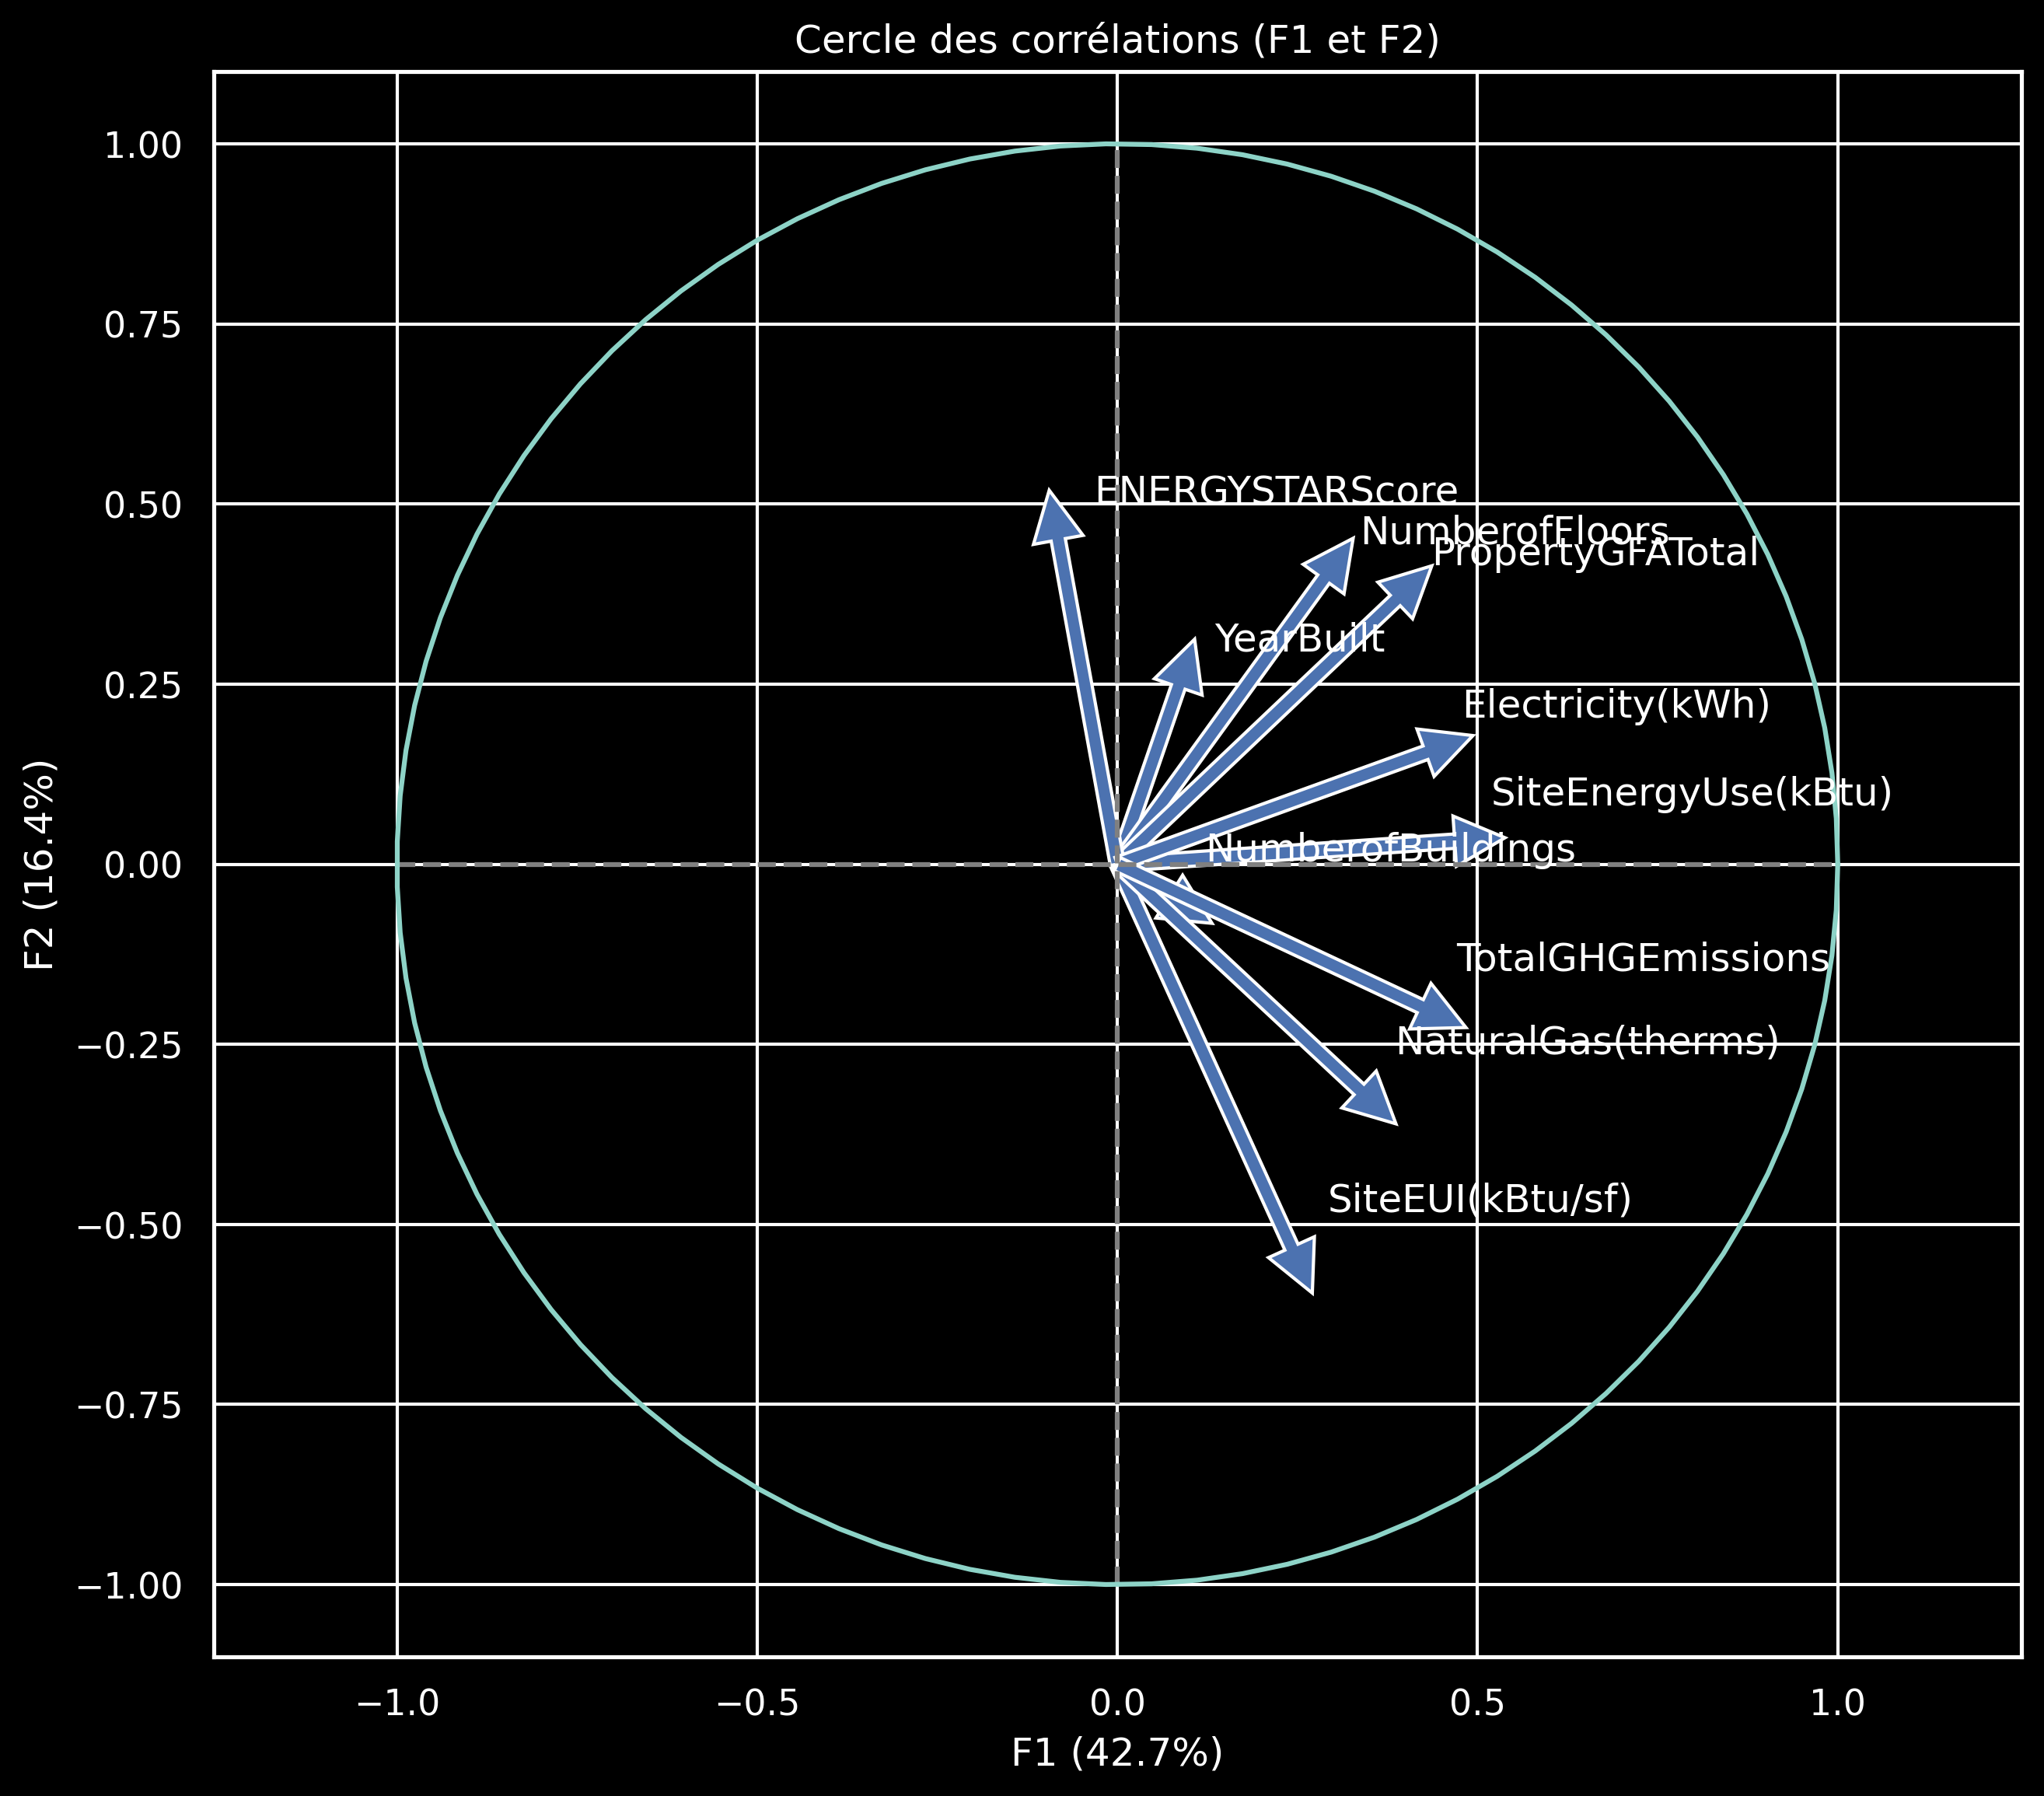

In [69]:
x,y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

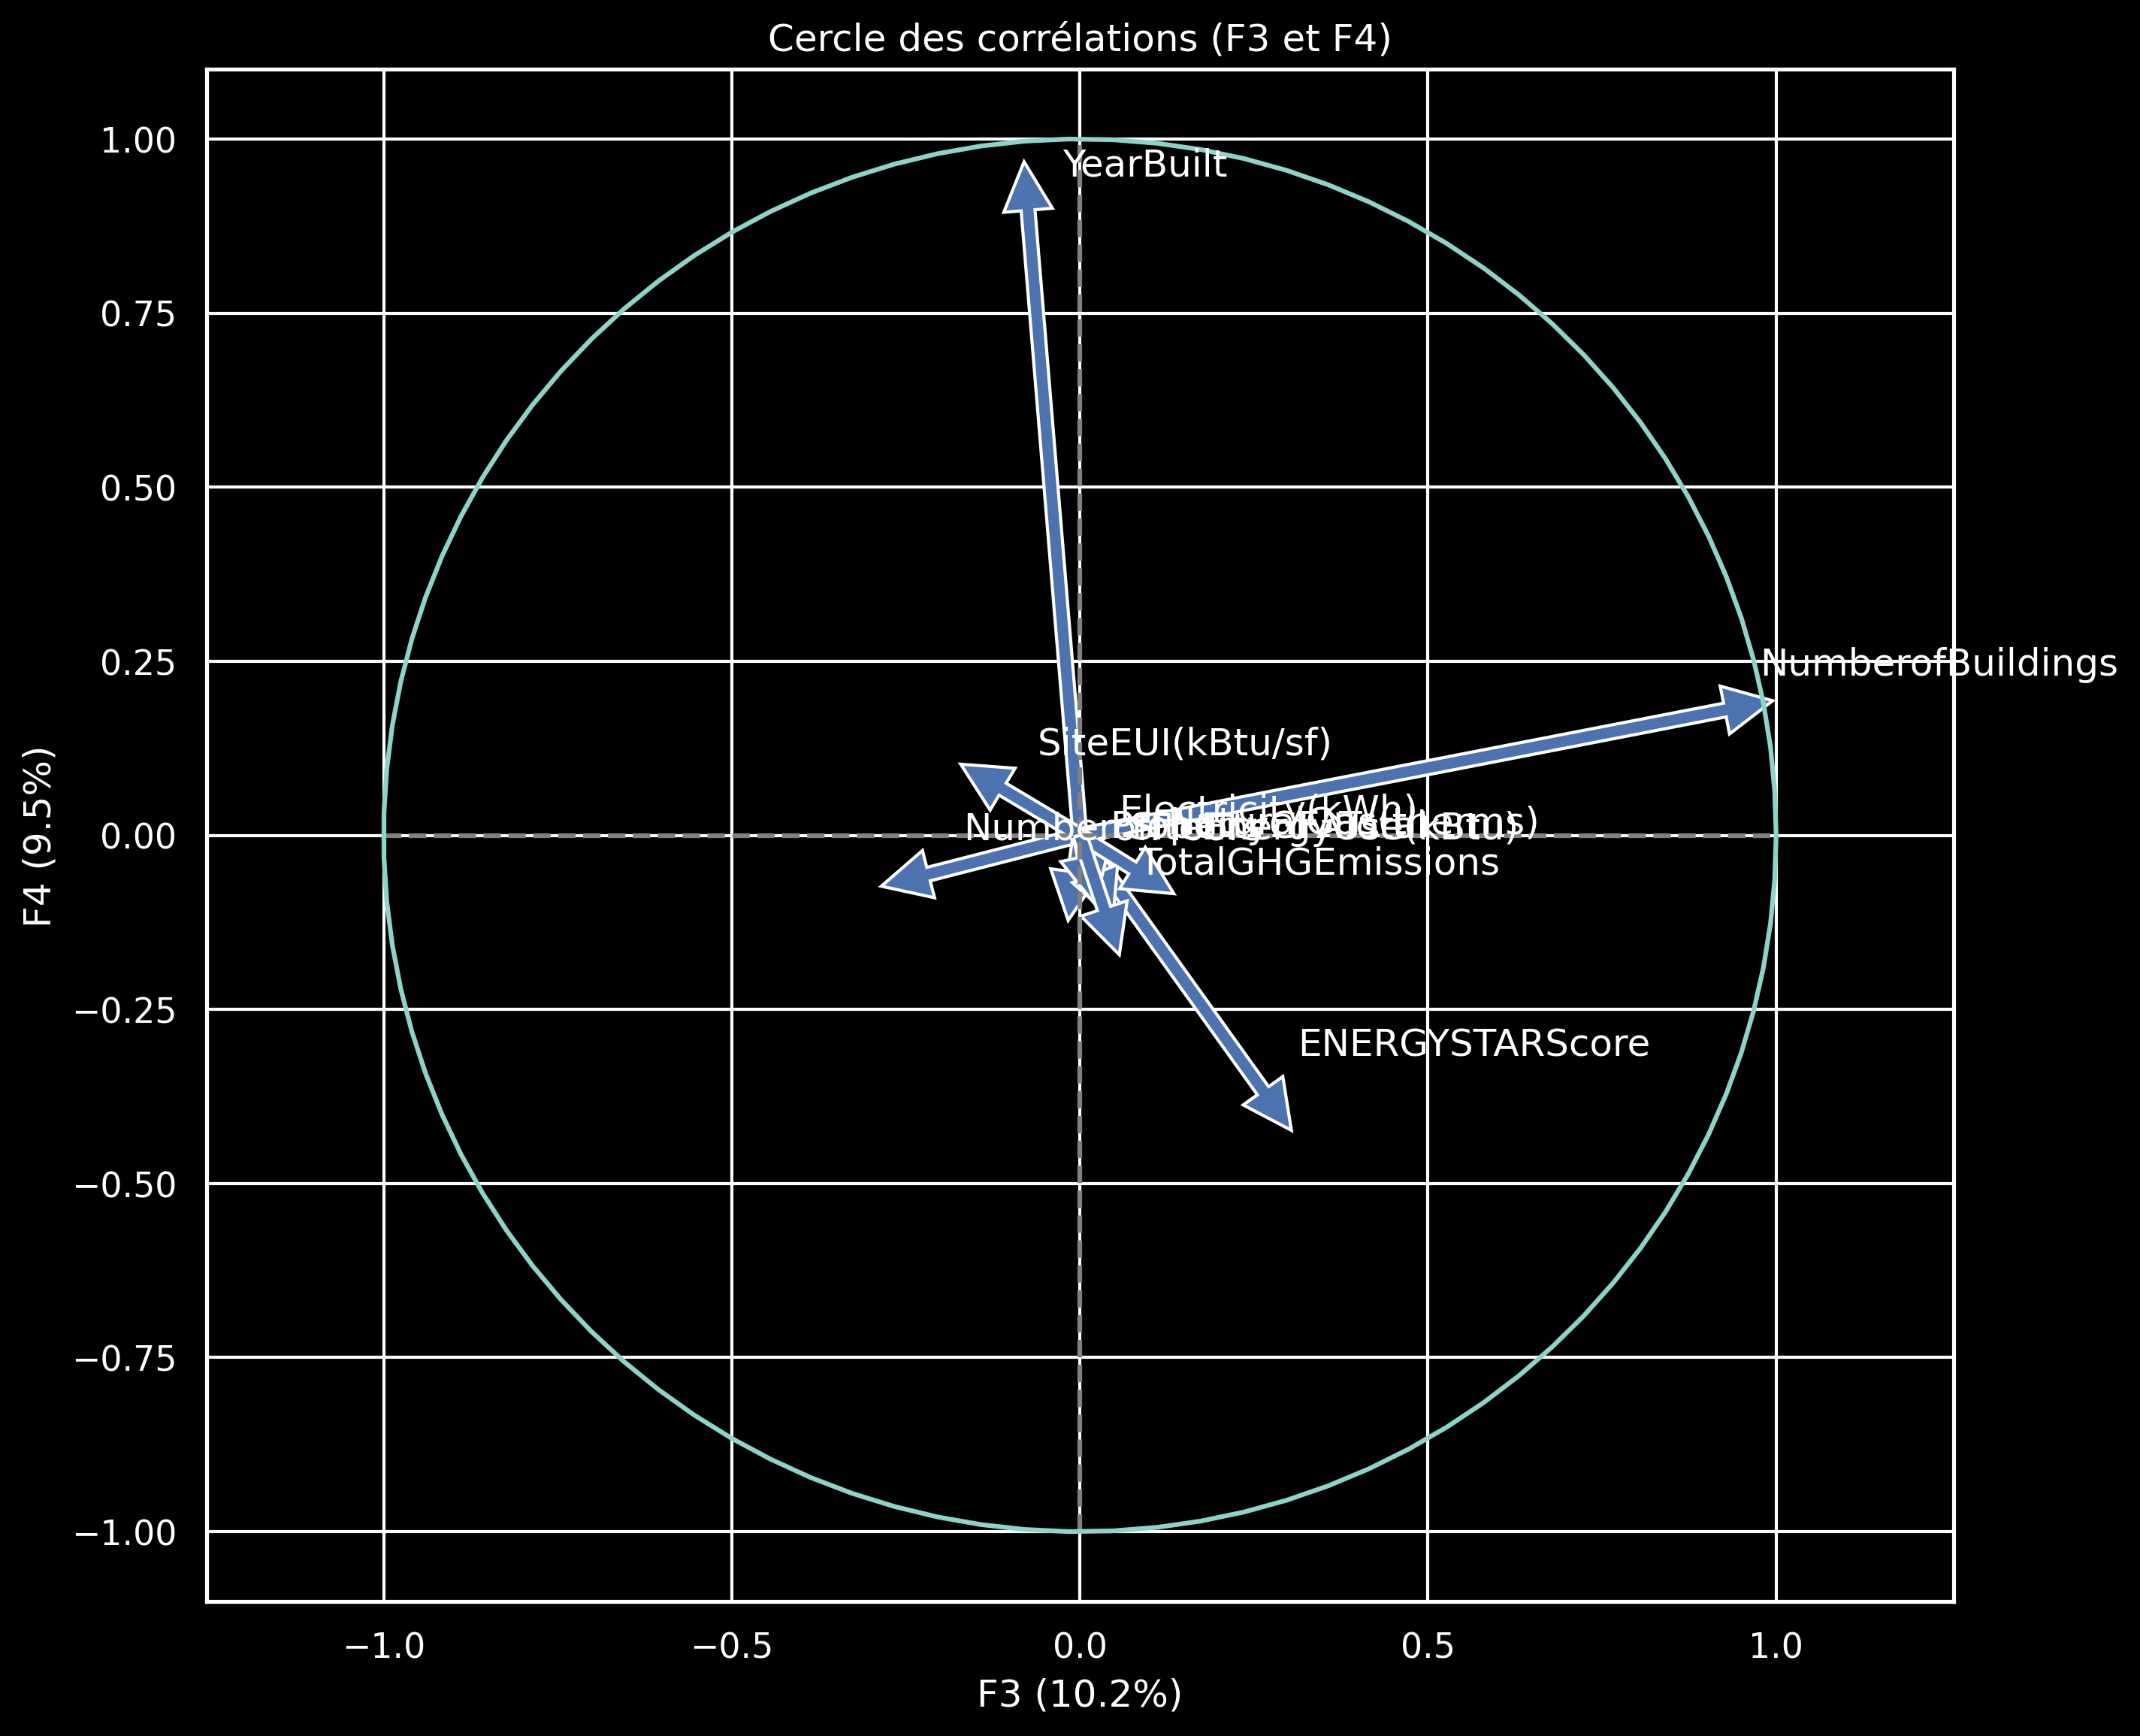

In [70]:
x,y = 2,3
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC1
             pca.components_[3, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[2, i] + 0.05,
             pca.components_[3, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [16]:
df_clean.to_csv('buildings_cleaned_.csv', index=False)